# Lab 1: Ensemble Learning - Part A
# Predicting Heart Disease using Max Voting Ensemble

**Objective:** Use the Max Voting simple ensemble technique with Decision Tree, Logistic Regression, and KNN classifiers to predict whether a patient has heart disease.

---

## 1. Import Required Python Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Methods
from sklearn.ensemble import VotingClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the heart disease dataset
df = pd.read_csv('heart_desease.csv')

# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Dataset Information

In [4]:
# Dataset shape
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset Shape: (1025, 14)
Number of rows: 1025
Number of columns: 14


In [5]:
# Column names and data types
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Statistical summary for numerical columns
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Statistical summary including categorical columns
print("\nStatistical Summary (All columns):")
df.describe(include='all')


Statistical Summary (All columns):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.2 Missing Values Analysis

In [8]:
# Check for missing values
print("Missing Values in Each Column:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df)

Missing Values in Each Column:
          Missing Values  Percentage
age                    0         0.0
sex                    0         0.0
cp                     0         0.0
trestbps               0         0.0
chol                   0         0.0
fbs                    0         0.0
restecg                0         0.0
thalach                0         0.0
exang                  0         0.0
oldpeak                0         0.0
slope                  0         0.0
ca                     0         0.0
thal                   0         0.0
target                 0         0.0


### 3.3 Duplicate Values Analysis

In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)])

Number of duplicate rows: 723

Duplicate rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  targe

### 3.4 Target Variable Analysis

In [11]:
# Analyze the target variable
print("Target Variable Distribution:")
print(df['target'].value_counts())
print(f"\nPercentage Distribution:")
print(df['target'].value_counts(normalize=True) * 100)

Target Variable Distribution:
target
1    526
0    499
Name: count, dtype: int64

Percentage Distribution:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


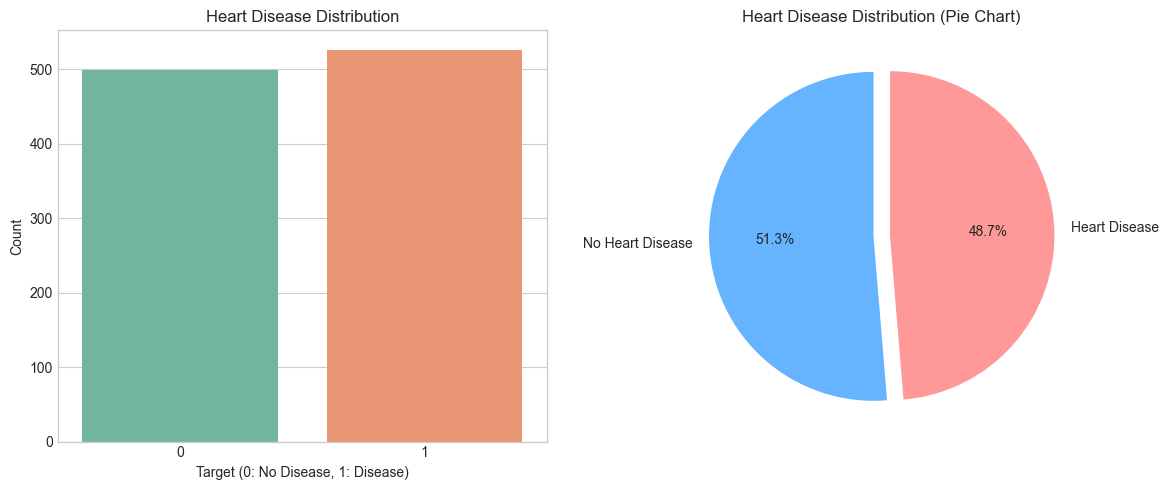

In [12]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(x='target', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Heart Disease Distribution')
axes[0].set_xlabel('Target (0: No Disease, 1: Disease)')
axes[0].set_ylabel('Count')

# Pie chart
labels = ['No Heart Disease', 'Heart Disease']
colors = ['#66b3ff', '#ff9999']
axes[1].pie(df['target'].value_counts(), labels=labels, colors=colors, 
            autopct='%1.1f%%', startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Heart Disease Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

### 3.5 Feature Distribution Analysis

In [13]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (14): ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Categorical columns (0): []


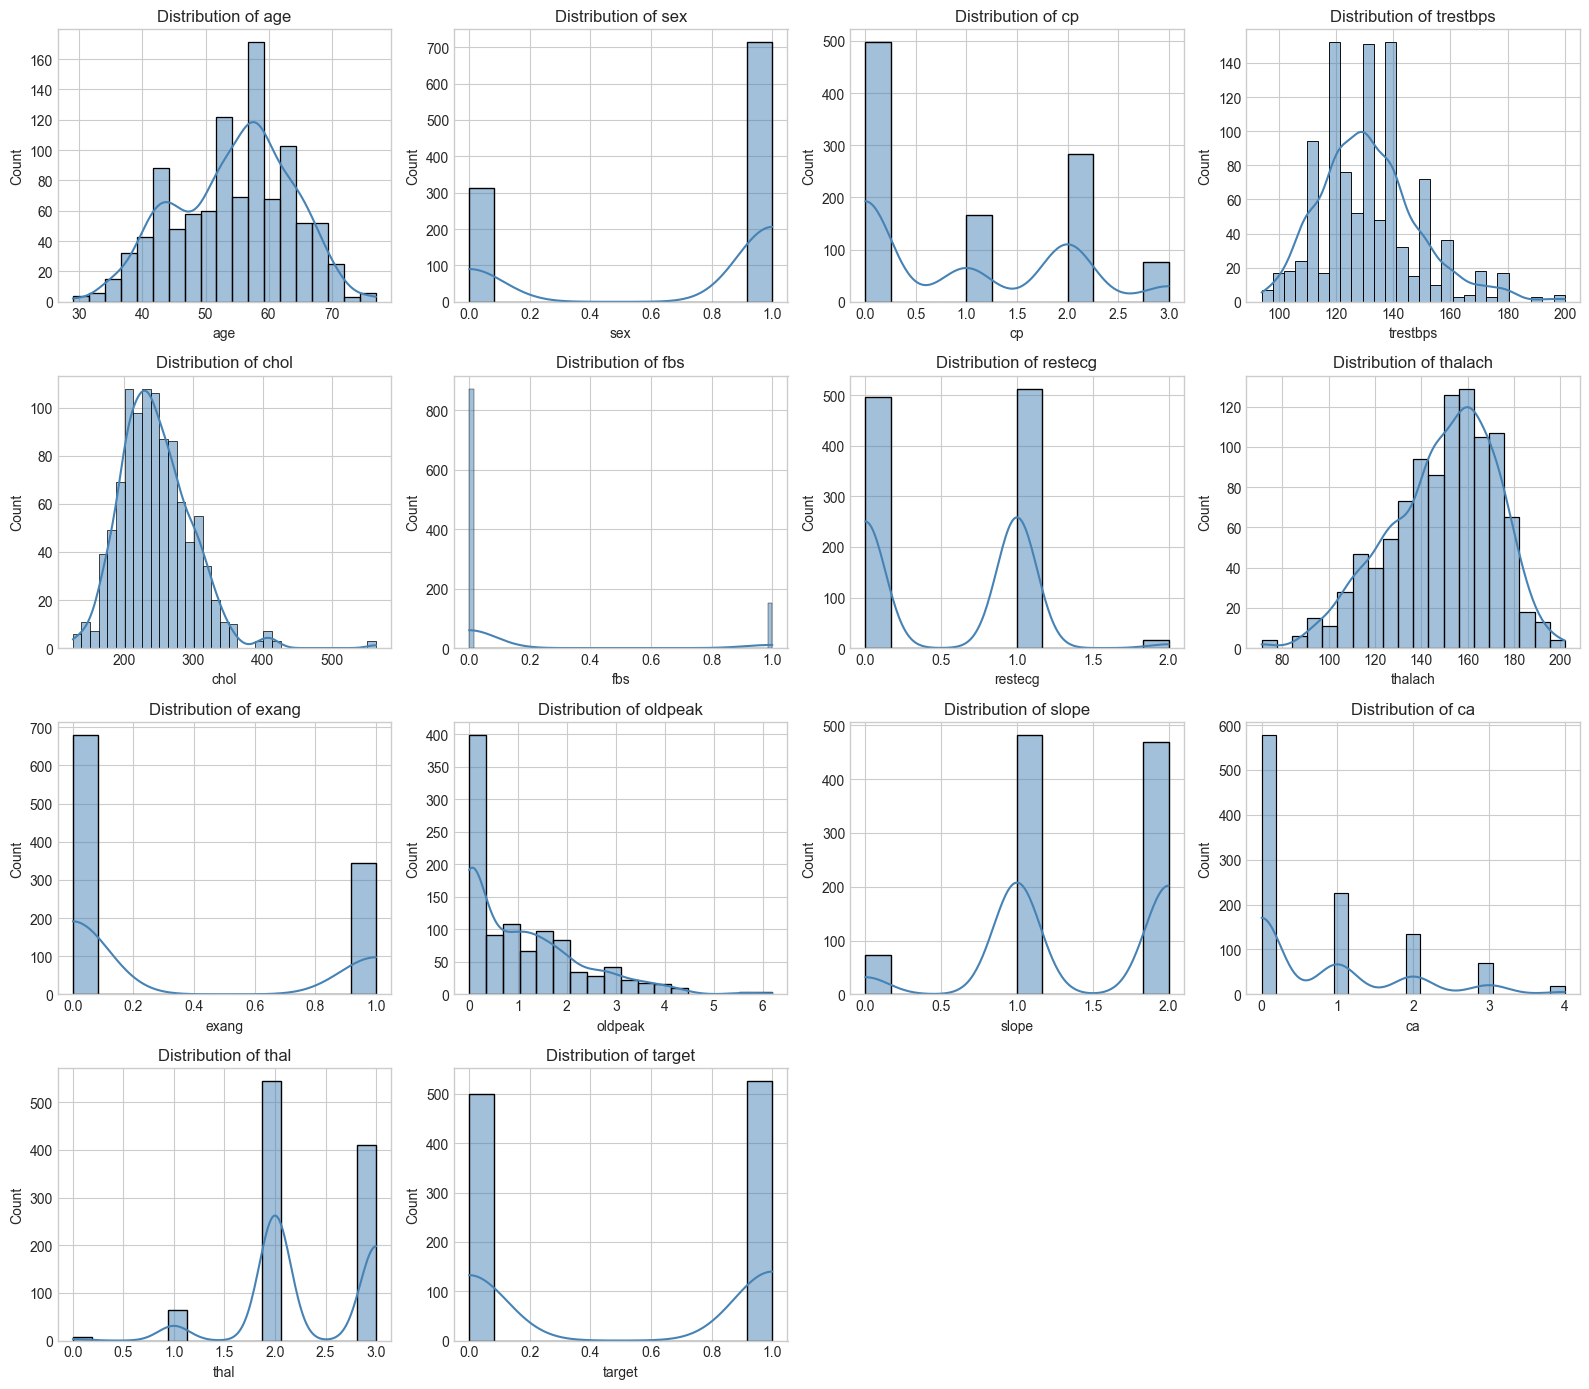

In [14]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < 16:
        sns.histplot(df[col], kde=True, ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)

# Hide empty subplots
for idx in range(len(numerical_cols), 16):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

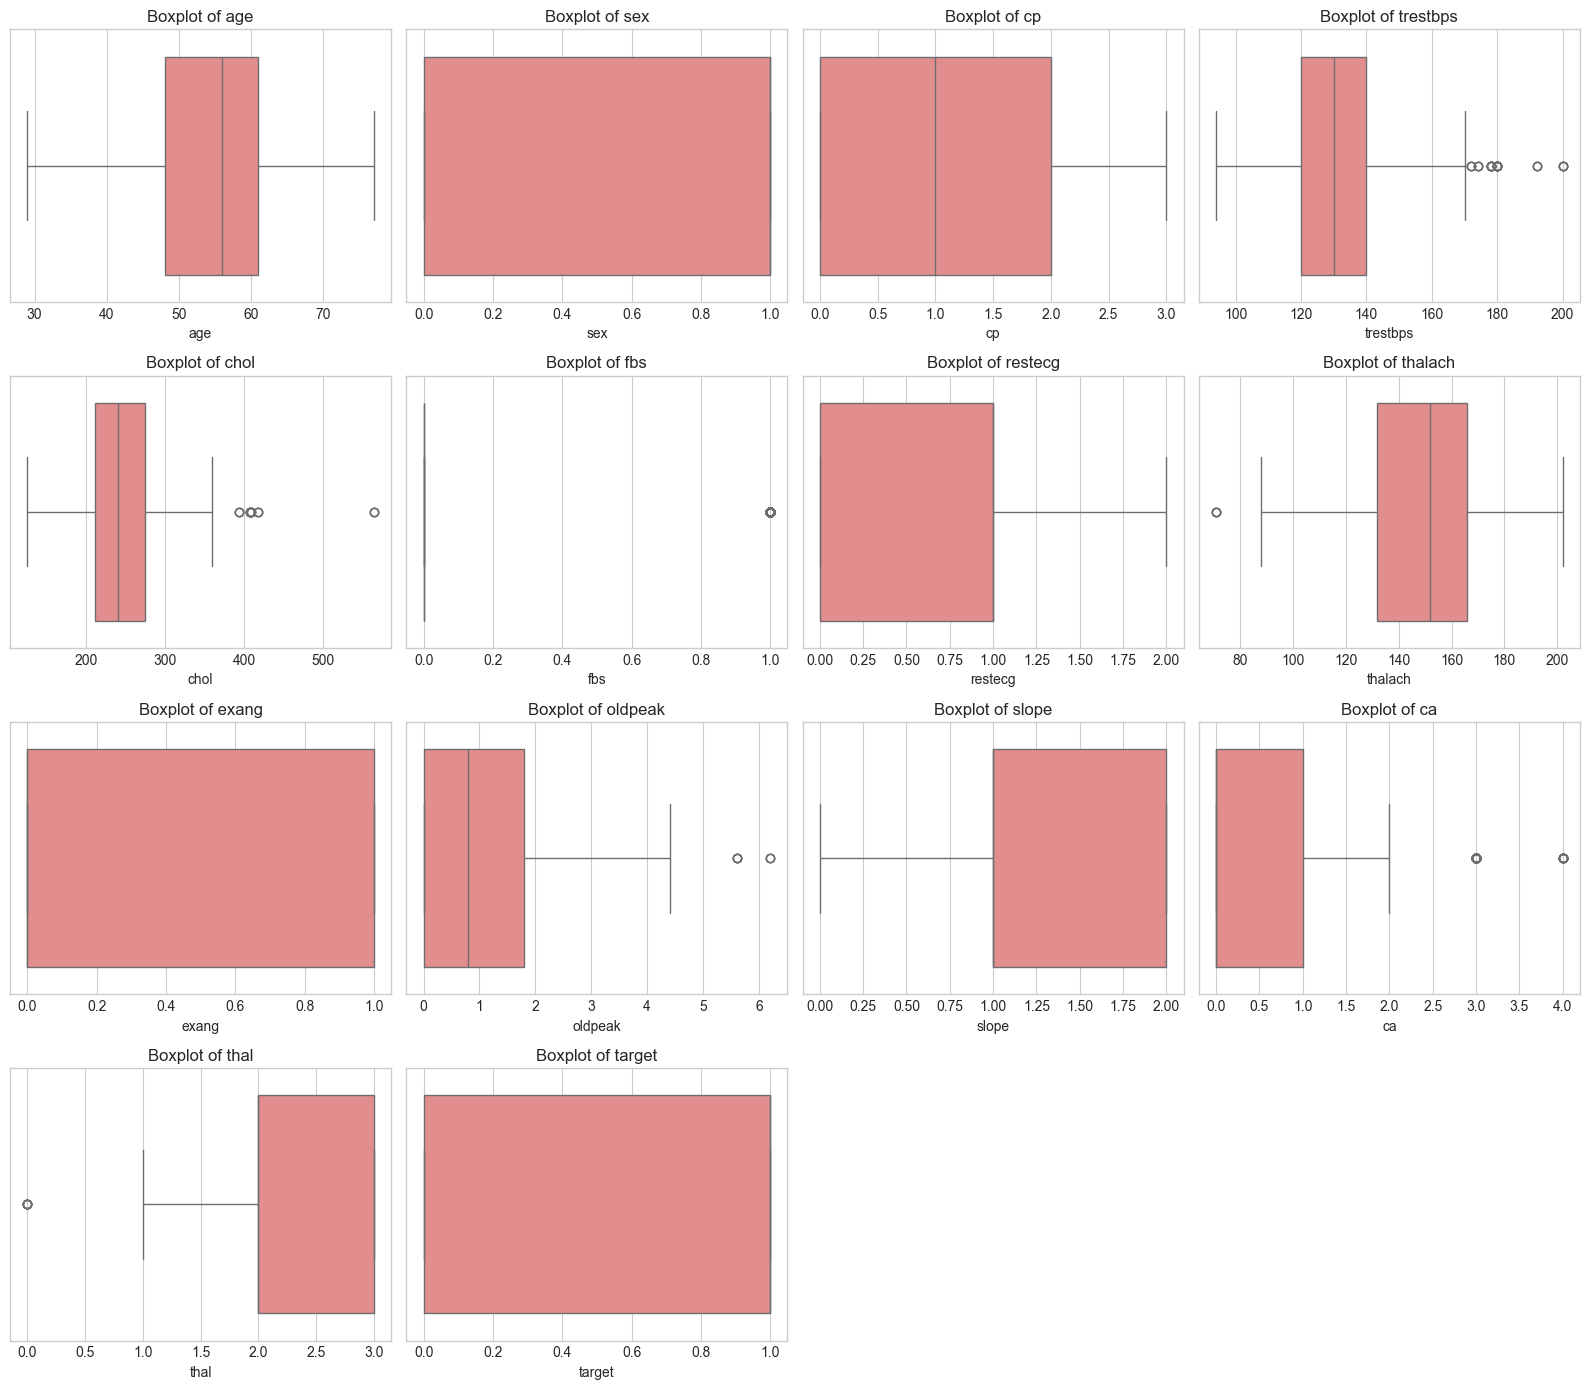

In [15]:
# Box plots for numerical features to detect outliers
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < 16:
        sns.boxplot(x=df[col], ax=axes[idx], color='lightcoral')
        axes[idx].set_title(f'Boxplot of {col}')

# Hide empty subplots
for idx in range(len(numerical_cols), 16):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### 3.6 Correlation Analysis

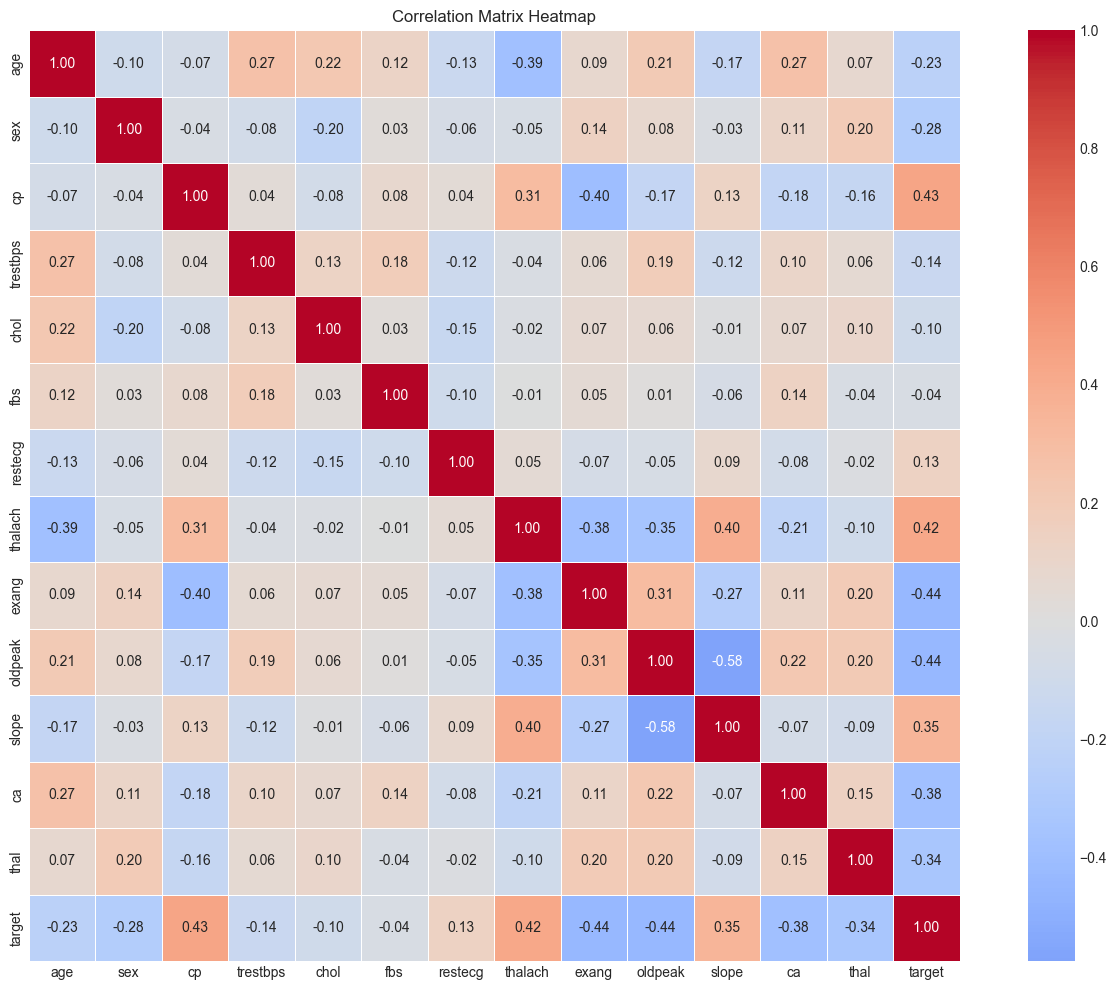

In [16]:
# Correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [17]:
# Correlation with target variable
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation with Target Variable:")
print(target_correlation)

Correlation with Target Variable:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


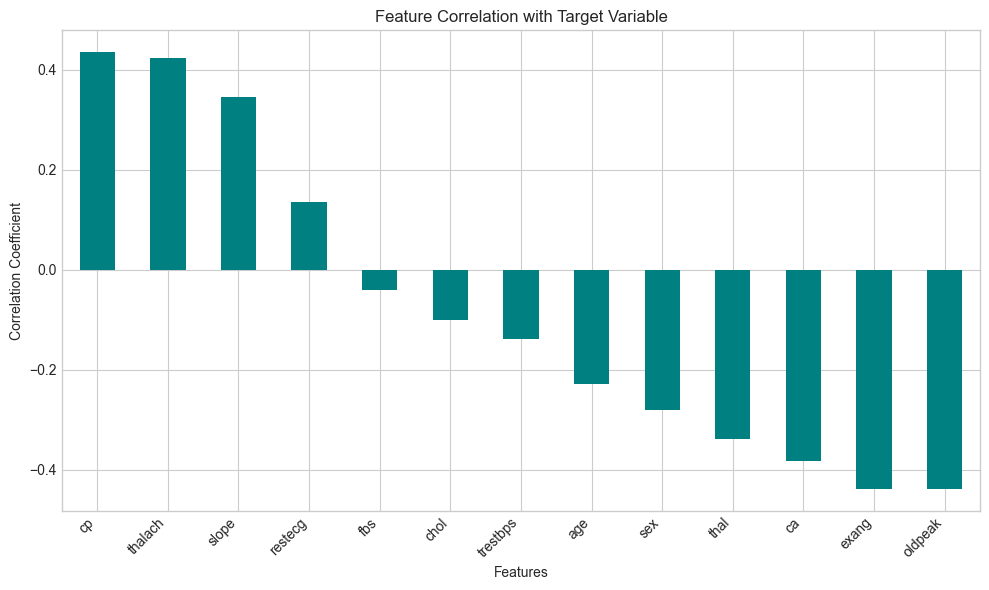

In [18]:
# Visualize correlation with target
plt.figure(figsize=(10, 6))
target_correlation.drop('target').plot(kind='bar', color='teal')
plt.title('Feature Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.7 Feature Analysis by Target Variable

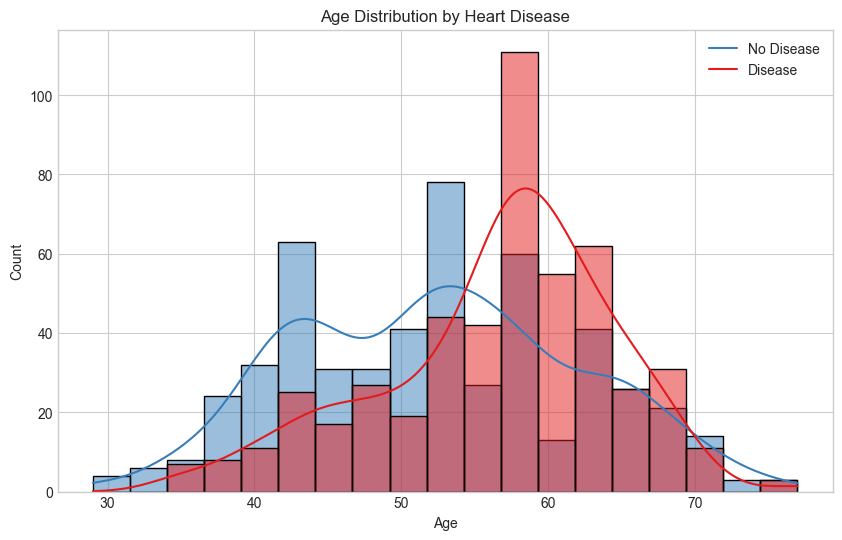

In [19]:
# Age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, palette='Set1')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.legend(['No Disease', 'Disease'])
plt.show()

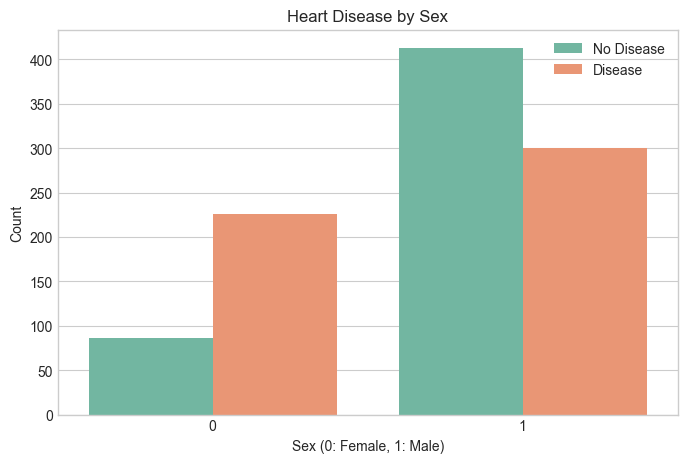

In [20]:
# Sex distribution by target
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='target', data=df, palette='Set2')
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

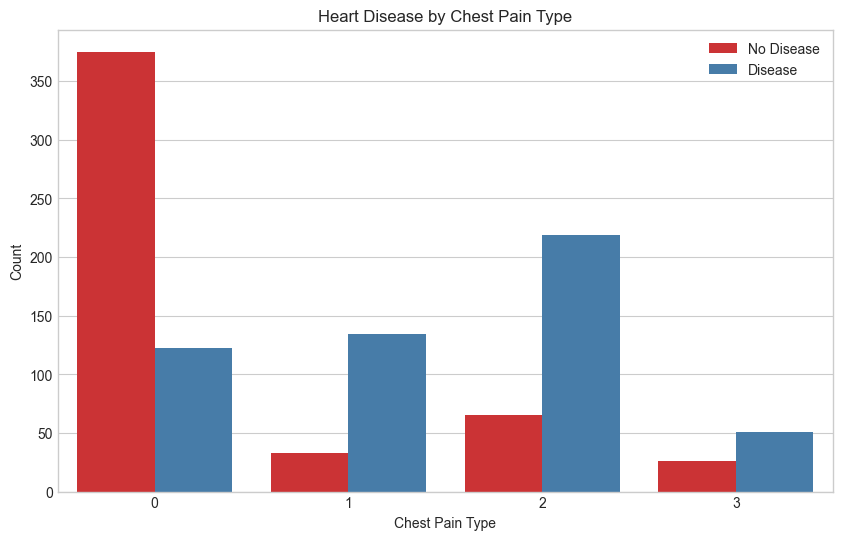

In [21]:
# Chest pain type by target
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='Set1')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

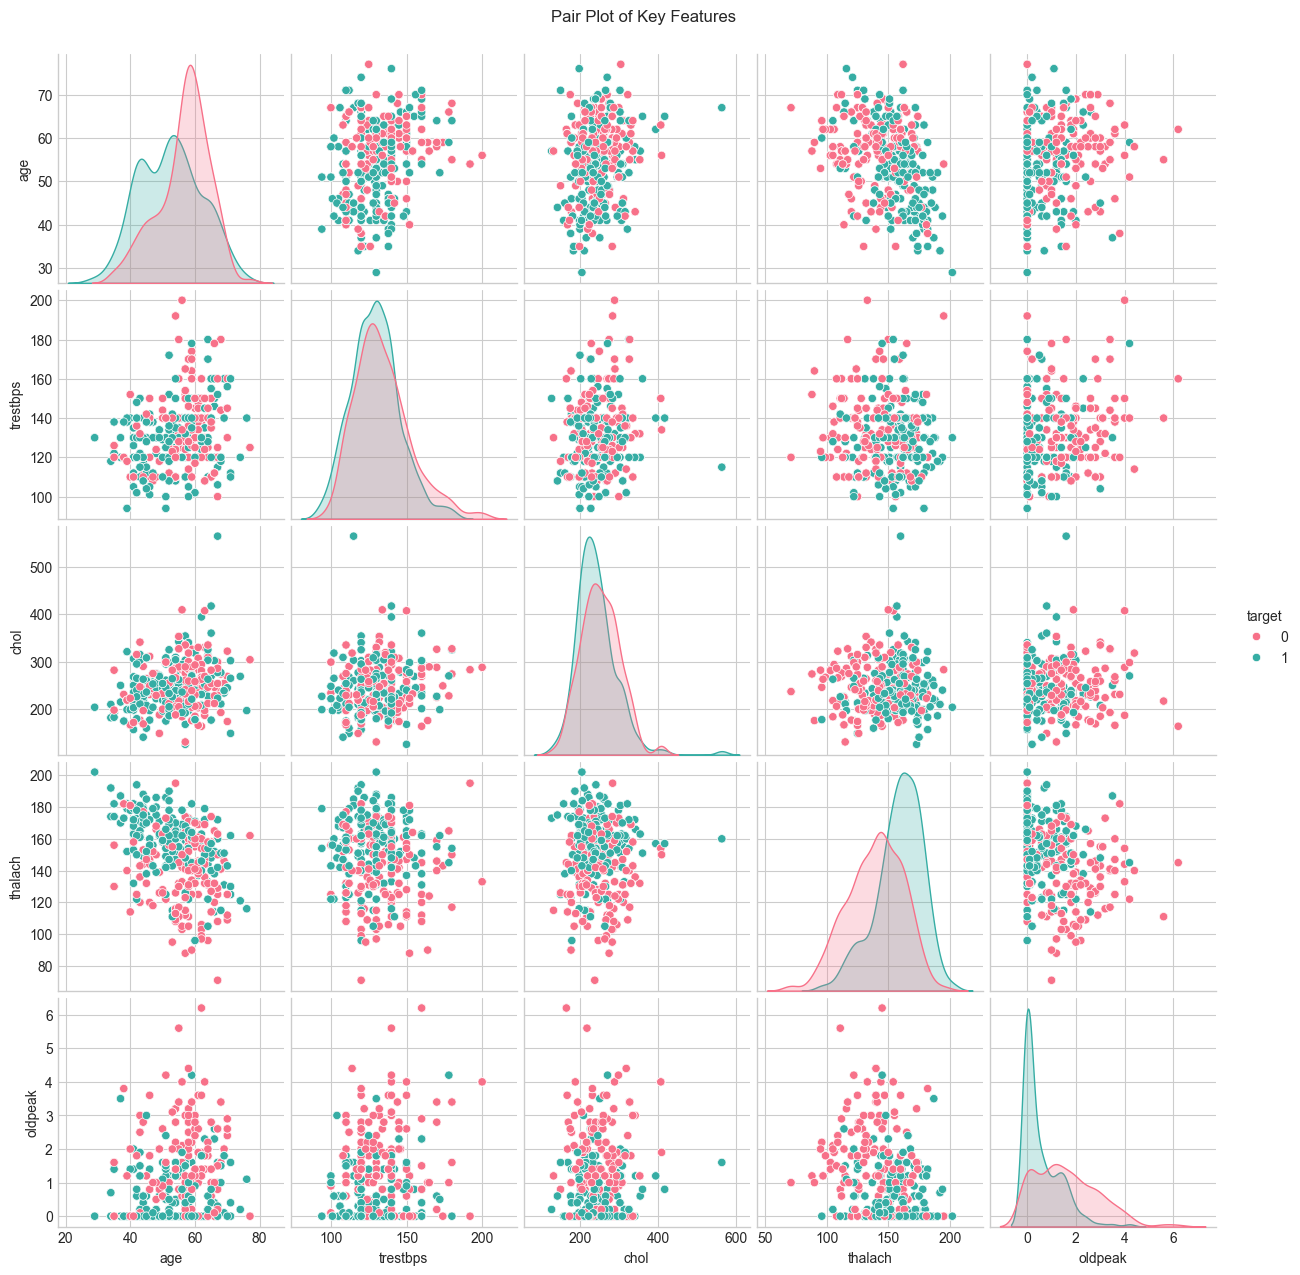

In [22]:
# Pair plot for key features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[key_features], hue='target', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

## 4. Feature Engineering and Feature Selection

### 4.1 Handle Missing Values (if any)

In [23]:
# Check for missing values again
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values if any (using median for numerical columns)
if df.isnull().sum().sum() > 0:
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    print("\nMissing values after handling:")
    print(df.isnull().sum())
else:
    print("\nNo missing values to handle.")

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values to handle.


### 4.2 Handle Duplicates

In [24]:
# Remove duplicates if any
print(f"Shape before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape before removing duplicates: (1025, 14)
Shape after removing duplicates: (302, 14)


### 4.3 Feature Engineering - Create New Features

In [25]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100], 
                          labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Create blood pressure categories
df['bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 140, 180, 300],
                            labels=['Normal', 'Elevated', 'High', 'Very High'])

# Create cholesterol categories
df['chol_category'] = pd.cut(df['chol'], bins=[0, 200, 240, 600],
                              labels=['Desirable', 'Borderline', 'High'])

# Display the engineered features
print("Dataset with engineered features:")
df.head()

Dataset with engineered features:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,bp_category,chol_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle,Elevated,Borderline
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle,Elevated,Borderline
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior,High,Desirable
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior,High,Borderline
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior,Elevated,High


In [26]:
# One-hot encode categorical features created
df_encoded = pd.get_dummies(df, columns=['age_group', 'bp_category', 'chol_category'], drop_first=True)
print(f"\nShape after encoding: {df_encoded.shape}")
df_encoded.head()


Shape after encoding: (302, 22)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_Middle,age_group_Senior,age_group_Elderly,bp_category_Elevated,bp_category_High,bp_category_Very High,chol_category_Borderline,chol_category_High
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,True,False,False,True,False,False,True,False
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,True,False,False,True,False,False,True,False
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,False,True,False,False,True,False,False,False
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,False,True,False,False,True,False,True,False
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,False,True,False,True,False,False,False,True


### 4.4 Feature Selection

In [27]:
# Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (302, 21)
Target shape: (302,)


In [28]:
# Feature selection using SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values('Score', ascending=False)

print("Feature Importance Scores (ANOVA F-test):")
print(feature_scores)

Feature Importance Scores (ANOVA F-test):
                     Feature      Score       P-Value
8                      exang  70.255191  2.046468e-15
2                         cp  68.864299  3.627384e-15
9                    oldpeak  67.721931  5.814567e-15
7                    thalach  64.237793  2.476146e-14
11                        ca  60.262749  1.317346e-13
10                     slope  40.249626  8.221389e-10
12                      thal  40.027376  9.089044e-10
14          age_group_Senior  27.395820  3.121750e-07
1                        sex  26.240952  5.402436e-07
13          age_group_Middle  18.013992  2.926642e-05
0                        age  15.474511  1.039484e-04
3                   trestbps   6.558676  1.092654e-02
6                    restecg   5.558449  1.903361e-02
20        chol_category_High   5.397625  2.083254e-02
17          bp_category_High   4.235100  4.045999e-02
19  chol_category_Borderline   4.010741  4.611085e-02
18     bp_category_Very High   2.395793 

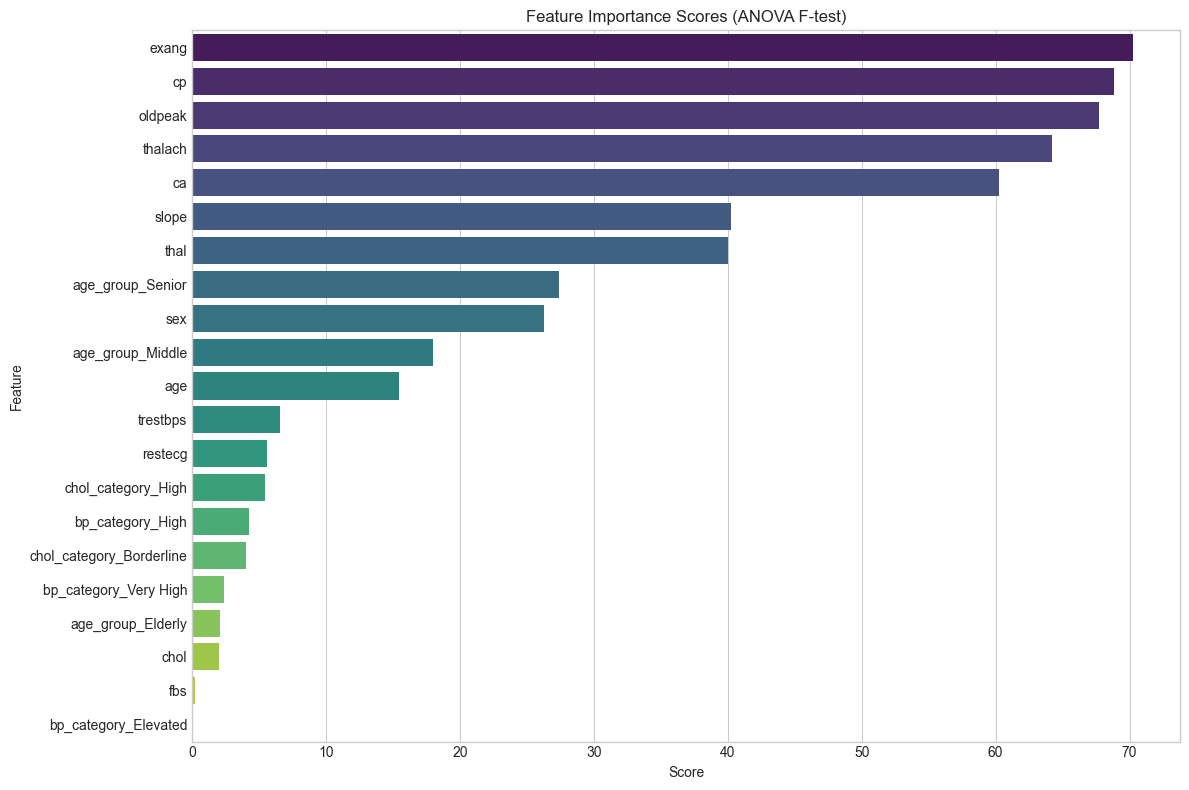

In [29]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Importance Scores (ANOVA F-test)')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [30]:
# Select top features based on statistical significance (p-value < 0.05)
significant_features = feature_scores[feature_scores['P-Value'] < 0.05]['Feature'].tolist()
print(f"\nStatistically Significant Features ({len(significant_features)}):")
print(significant_features)


Statistically Significant Features (16):
['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal', 'age_group_Senior', 'sex', 'age_group_Middle', 'age', 'trestbps', 'restecg', 'chol_category_High', 'bp_category_High', 'chol_category_Borderline']


In [31]:
# Select top 10 features for model building
top_features = feature_scores.head(10)['Feature'].tolist()
print(f"\nTop 10 Features Selected for Model:")
print(top_features)

# Create final feature set
X_selected = X[top_features]
print(f"\nSelected features shape: {X_selected.shape}")


Top 10 Features Selected for Model:
['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal', 'age_group_Senior', 'sex', 'age_group_Middle']

Selected features shape: (302, 10)


### 4.5 Train-Test Split

In [32]:
# Split the data into training and testing sets (80-20 split)
random_state_num = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=random_state_num, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTesting set target distribution:")
print(y_test.value_counts())

Training set size: 241
Testing set size: 61

Training set target distribution:
target
1    131
0    110
Name: count, dtype: int64

Testing set target distribution:
target
1    33
0    28
Name: count, dtype: int64


### 4.6 Feature Scaling

In [33]:
# Standardize features (important for KNN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

Feature scaling completed!

Scaled training data shape: (241, 10)
Scaled testing data shape: (61, 10)


## 5. Apply Max Voting Ensemble Technique

### 5.1 Initialize Base Models

In [34]:
# Initialize the three classifiers

# 1. Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5)

# 2. Logistic Regression
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# 3. K-Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)

print("Base models initialized:")
print(f"1. Decision Tree Classifier: {dt_clf}")
print(f"2. Logistic Regression: {lr_clf}")
print(f"3. KNN Classifier: {knn_clf}")

Base models initialized:
1. Decision Tree Classifier: DecisionTreeClassifier(max_depth=5, random_state=42)
2. Logistic Regression: LogisticRegression(max_iter=1000, random_state=42)
3. KNN Classifier: KNeighborsClassifier()


### 5.2 Train Individual Models

In [35]:
# Train Decision Tree
dt_clf.fit(X_train_scaled, y_train)
dt_pred = dt_clf.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.8197


In [36]:
# Train Logistic Regression
lr_clf.fit(X_train_scaled, y_train)
lr_pred = lr_clf.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.8197


In [37]:
# Train KNN
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.7213


### 5.3 Create Max Voting Ensemble

In [38]:
# Create Voting Classifier with 'hard' voting (Max Voting)
# Hard voting = majority voting (each classifier gets one vote)

voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', DecisionTreeClassifier(random_state=42, max_depth=5)),
        ('logistic_regression', LogisticRegression(random_state=42, max_iter=1000)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='hard'  # Max voting (majority voting)
)

print("Max Voting Ensemble Classifier created!")
print(voting_clf)

Max Voting Ensemble Classifier created!
VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('logistic_regression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('knn', KNeighborsClassifier())])


In [39]:
# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)
print("Voting Classifier trained successfully!")

Voting Classifier trained successfully!


In [40]:
# Make predictions with the ensemble
voting_pred = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, voting_pred)
print(f"Max Voting Ensemble Accuracy: {voting_accuracy:.4f}")

Max Voting Ensemble Accuracy: 0.8033


## 6. Model Evaluation and Comparison

### 6.1 Compare All Models

In [41]:
# Create a comparison dataframe
models = ['Decision Tree', 'Logistic Regression', 'KNN', 'Max Voting Ensemble']
predictions = [dt_pred, lr_pred, knn_pred, voting_pred]

comparison_results = []

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    comparison_results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

comparison_df = pd.DataFrame(comparison_results)
print("Model Comparison Results:")
comparison_df

Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.819672,0.805556,0.878788,0.840580
1,Logistic Regression,0.819672,0.823529,0.848485,0.835821
2,KNN,0.721311,0.750000,0.727273,0.738462
3,Max Voting Ensemble,0.803279,0.783784,0.878788,0.828571


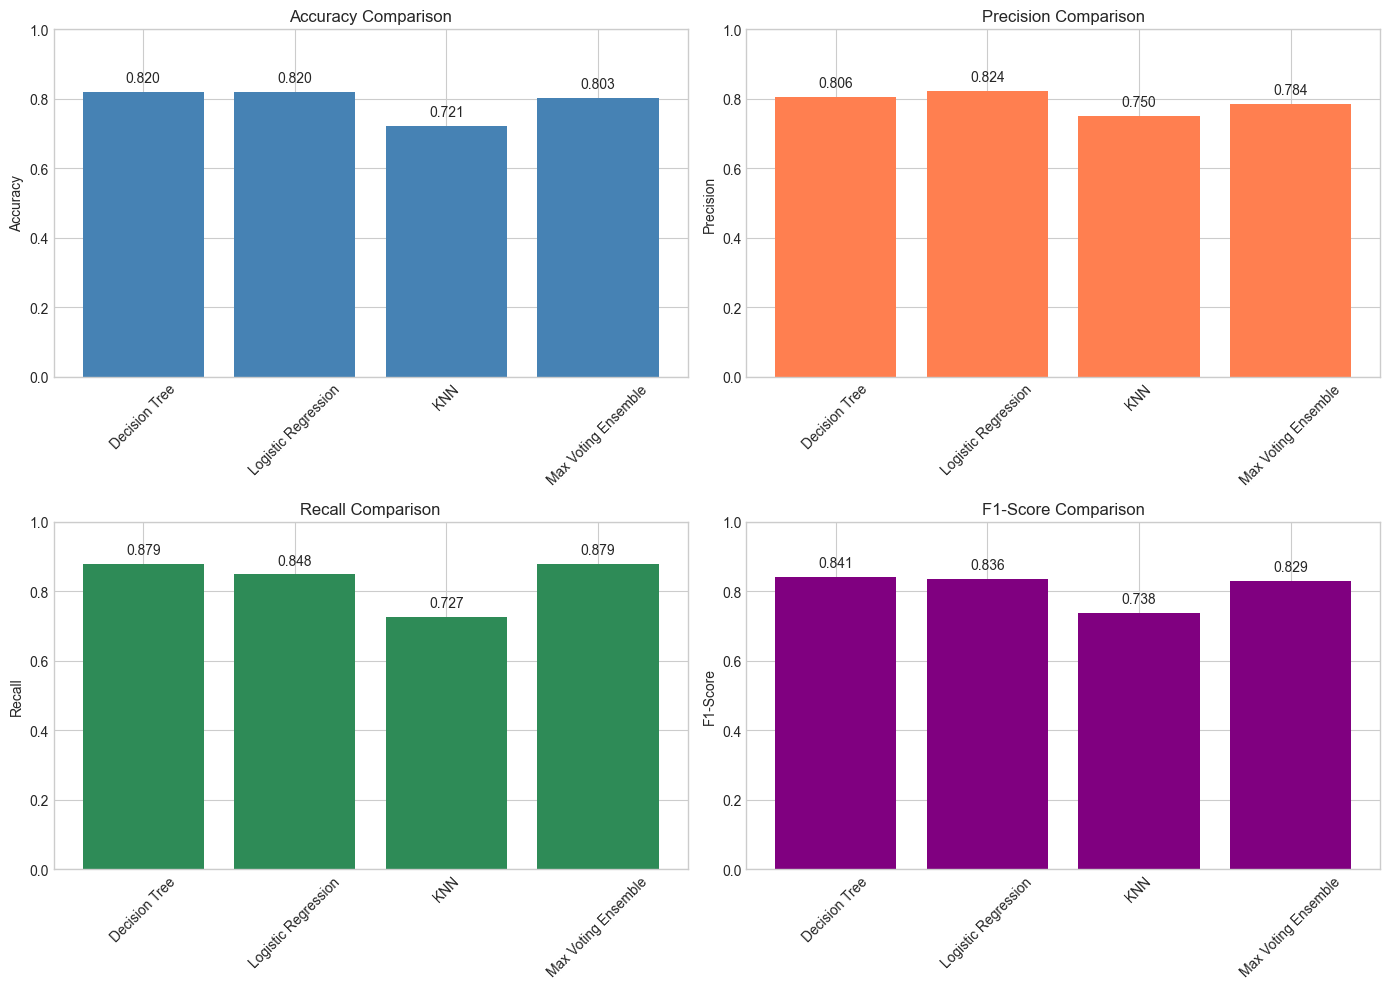

In [42]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['steelblue', 'coral', 'seagreen', 'purple']

for idx, (metric, ax) in enumerate(zip(metrics, axes.flatten())):
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=colors[idx])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, val in zip(bars, comparison_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{val:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 6.2 Confusion Matrices

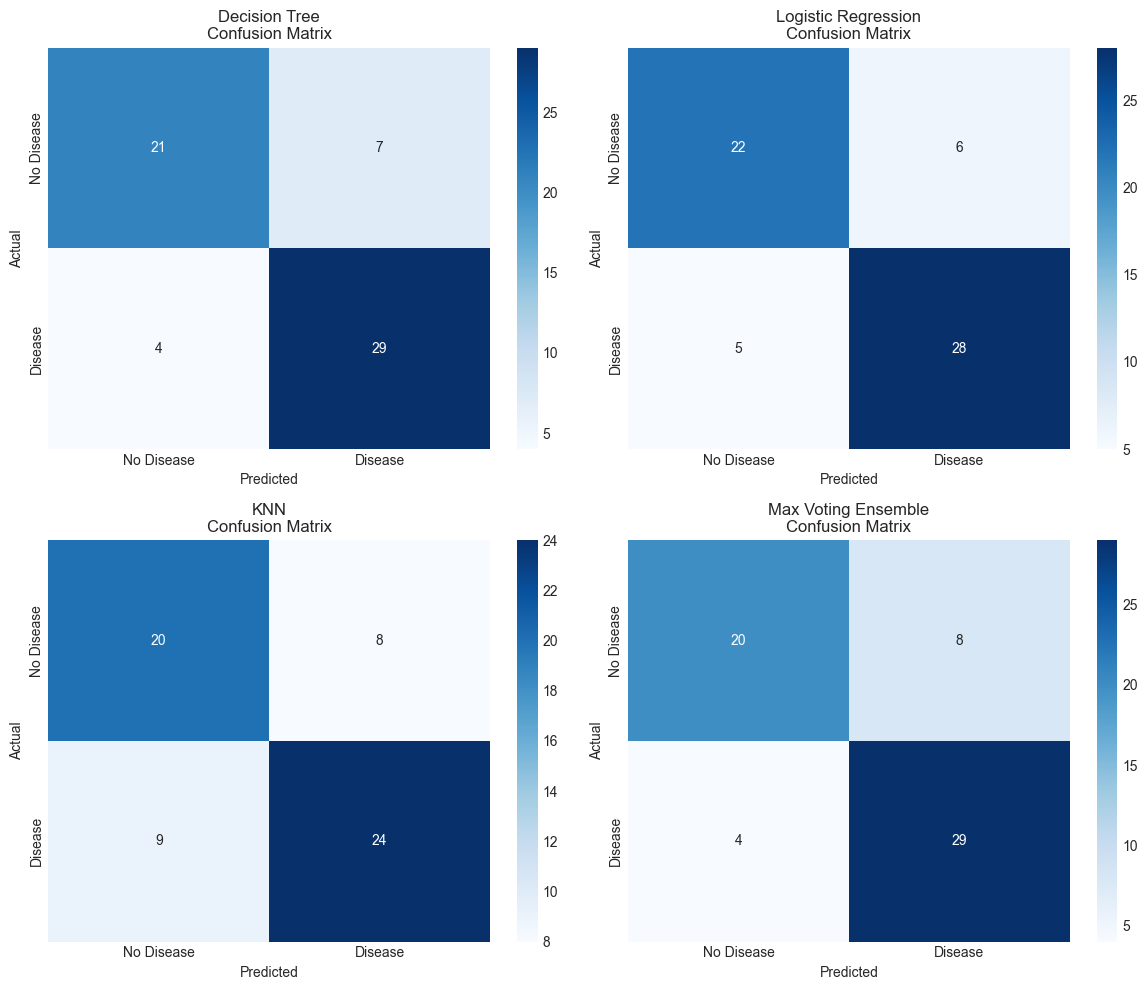

In [43]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, (model, pred, ax) in enumerate(zip(models, predictions, axes.flatten())):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    ax.set_title(f'{model}\nConfusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### 6.3 Classification Reports

In [44]:
# Print classification reports for all models
for model, pred in zip(models, predictions):
    print(f"\n{'='*60}")
    print(f"Classification Report - {model}")
    print('='*60)
    print(classification_report(y_test, pred, target_names=['No Disease', 'Disease']))


Classification Report - Decision Tree
              precision    recall  f1-score   support

  No Disease       0.84      0.75      0.79        28
     Disease       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61


Classification Report - Logistic Regression
              precision    recall  f1-score   support

  No Disease       0.81      0.79      0.80        28
     Disease       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Classification Report - KNN
              precision    recall  f1-score   support

  No Disease       0.69      0.71      0.70        28
     Disease       0.75      0.73      0.74        33

    accuracy                           0.72        61
   macro avg   

## 7. Summary and Conclusions

In [45]:
print("="*70)
print("SUMMARY: HEART DISEASE PREDICTION USING MAX VOTING ENSEMBLE")
print("="*70)

print(f"\nDataset Summary:")
print(f"  - Total samples: {len(df_encoded)}")
print(f"  - Features used: {len(top_features)}")
print(f"  - Training samples: {len(X_train)}")
print(f"  - Testing samples: {len(X_test)}")

print(f"\nModel Performance Summary:")
print(comparison_df.to_string(index=False))

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
print(f"\nBest Performing Model: {best_model['Model']}")
print(f"Best Accuracy: {best_model['Accuracy']:.4f}")

print("\n" + "="*70)
print("Ensemble Learning - Max Voting successfully implemented!")
print("="*70)

SUMMARY: HEART DISEASE PREDICTION USING MAX VOTING ENSEMBLE

Dataset Summary:
  - Total samples: 302
  - Features used: 10
  - Training samples: 241
  - Testing samples: 61

Model Performance Summary:
              Model  Accuracy  Precision   Recall  F1-Score
      Decision Tree  0.819672   0.805556 0.878788  0.840580
Logistic Regression  0.819672   0.823529 0.848485  0.835821
                KNN  0.721311   0.750000 0.727273  0.738462
Max Voting Ensemble  0.803279   0.783784 0.878788  0.828571

Best Performing Model: Decision Tree
Best Accuracy: 0.8197

Ensemble Learning - Max Voting successfully implemented!
